<a href="https://colab.research.google.com/github/ruelanthonyb/sales-predictions/blob/main/Project_2_Part_2_(Core)_dataset_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 - Part 2 (Core)

Using the approved dataset you proposed for project 2 part 1 last week, you will clean and explore the data set.  

To meet the requirements for this week you must have:

-deleted unnecessary columns

-deleted duplicate rows

-identified and addressed missing values

-identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats)

-produced univariate visuals for the target and all features

-identified outliers

-produce a correlation heatmap and identify any moderate or strong correlations between your target and your features and/or between one feature and another

-clearly commented all of your cleaning steps and described any decisions you made  (Note: During the final stack of the program, you will be making a presentation for a technical audience that includes your decisions and process in the cleaning steps. The more notes you take now, the easier that presentation will be. To clarify, that presentation is NOT due now.)

Note that you should start working on your in depth EDA and making multivariate visuals for the upcoming part 3 of this assignment once you have submitted all tasks and your belt exam for this stack.

Commit your file to your Github repository.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Dataset 1
df1 = pd.read_csv('/content/drive/MyDrive/Coding Dojo PH/DS_Bootcamp/ML Fundamentals/Wk8/assignments/datasets/diamonds.csv')
print("First Choice: Diamonds Dataset")
print(df1)

First Choice: Diamonds Dataset
       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


# 1. Delete unnecessary columns

Not required, since all columns are necessary for this analysis.

# 2. Delete duplicate rows



In [ ]:
# Remove duplicate rows if any
df1 = df1.drop_duplicates()

# 3. Identify and address missing values

Since the dataset has no null values as per your info, we wouldn't need to handle missing data.

# 4. Identify and correct inconsistencies in categorical data

We need to standardize the categorical data.

In [ ]:
# Standardizing the text format for categorical columns
df1['cut'] = df1['cut'].str.title()  # Capitalize the first letter
df1['color'] = df1['color'].str.upper()  # Convert all to uppercase
df1['clarity'] = df1['clarity'].str.upper()  # Convert all to uppercase

# 5. Produce univariate visuals for the target and all features

We can create histograms, bar charts, and boxplots for individual features.

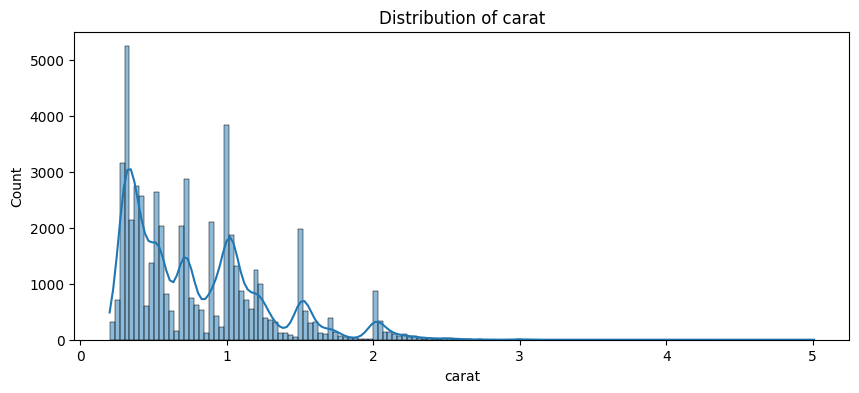

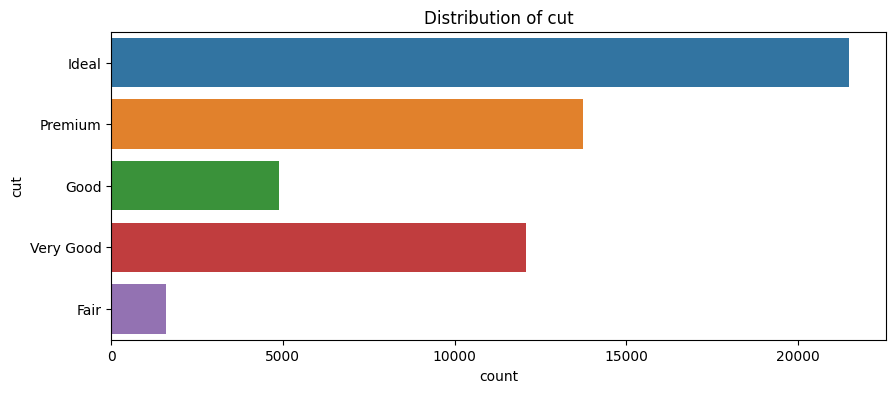

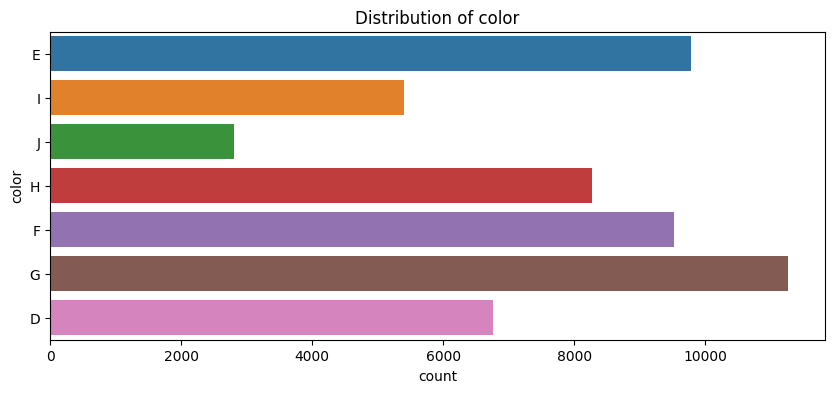

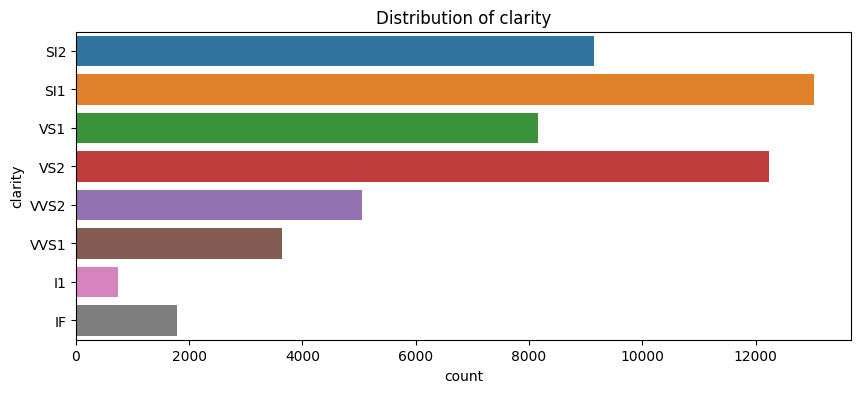

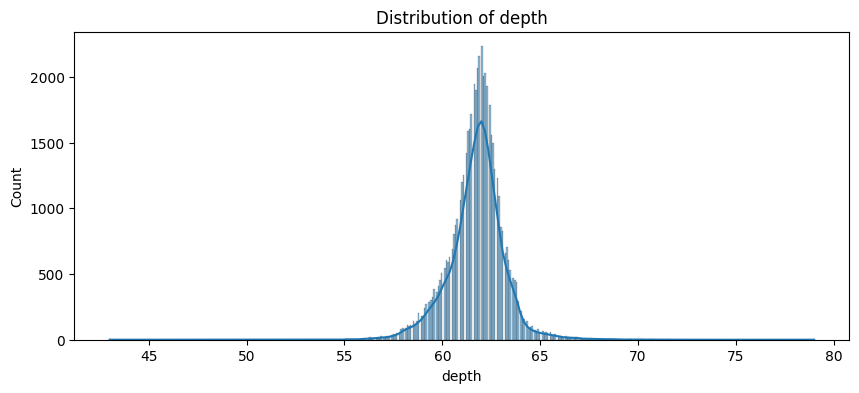

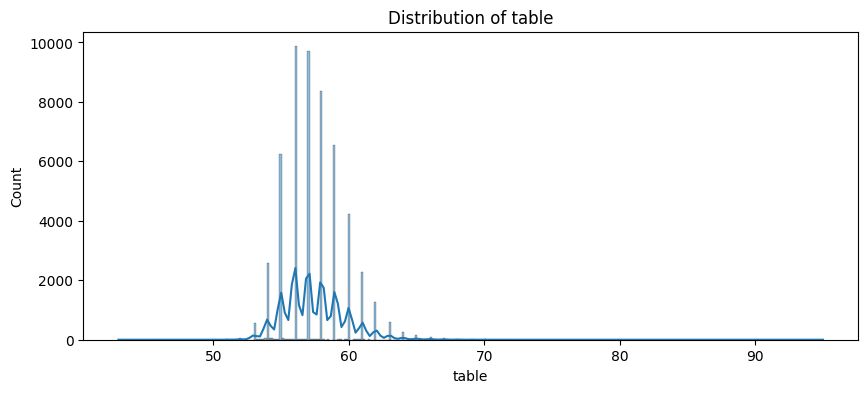

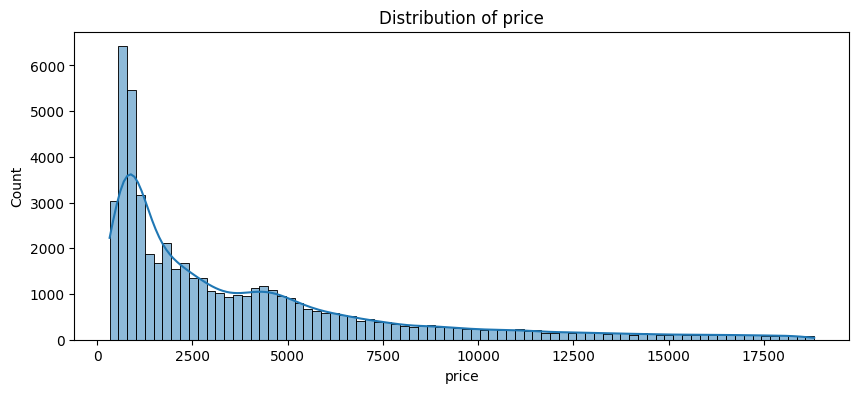

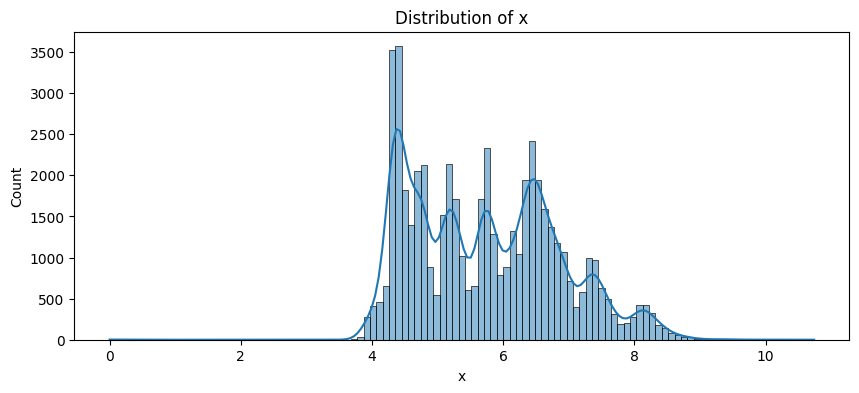

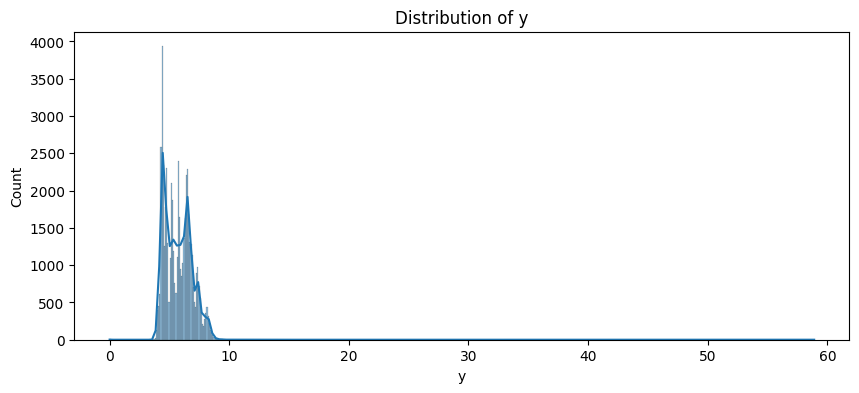

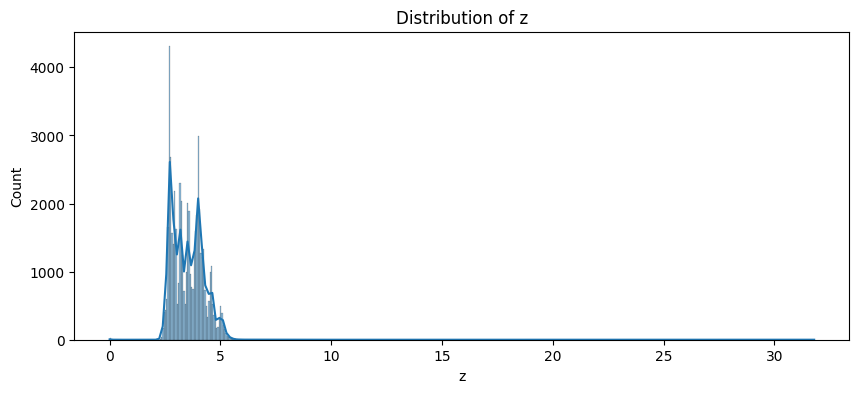

In [ ]:
# Univariate analysis visuals
for column in df1.columns:
    plt.figure(figsize=(10, 4))
    if df1[column].dtype == 'object':  # For categorical data
        sns.countplot(y=column, data=df1)
    else:  # For numerical data
        sns.histplot(df1[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# 6. Identify outliers

We can use boxplots to visually identify outliers or compute them statistically.

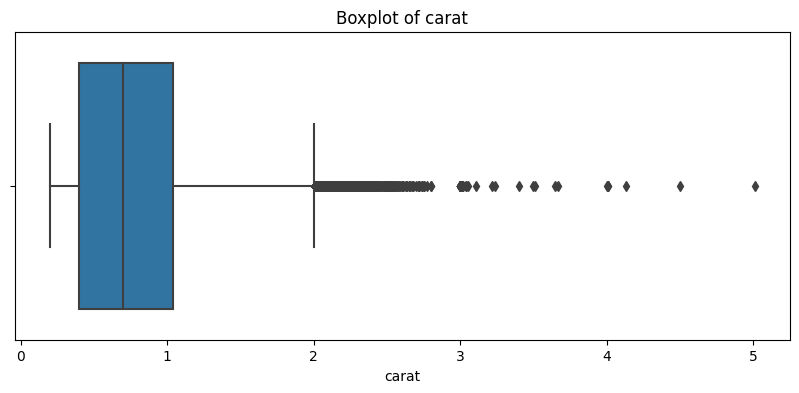

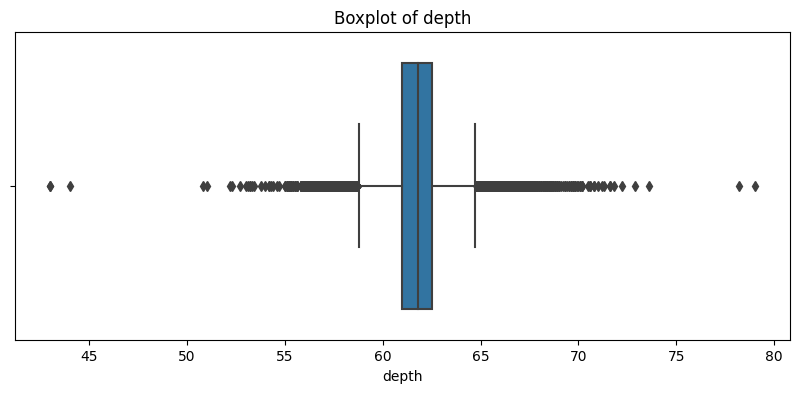

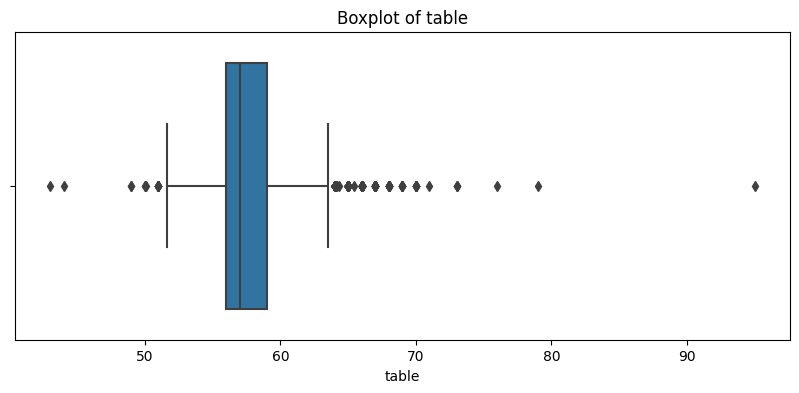

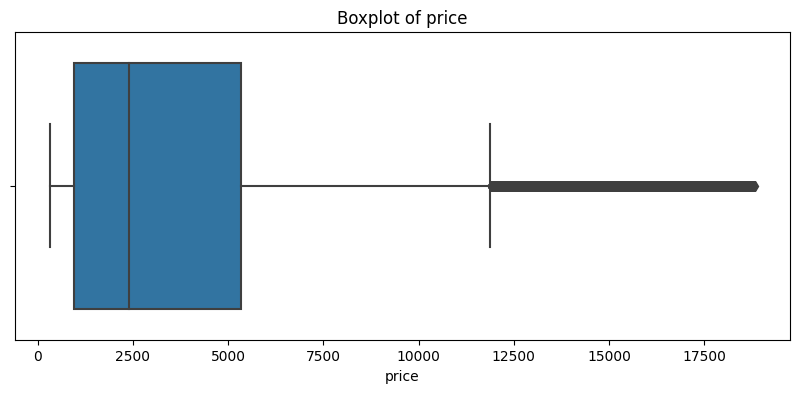

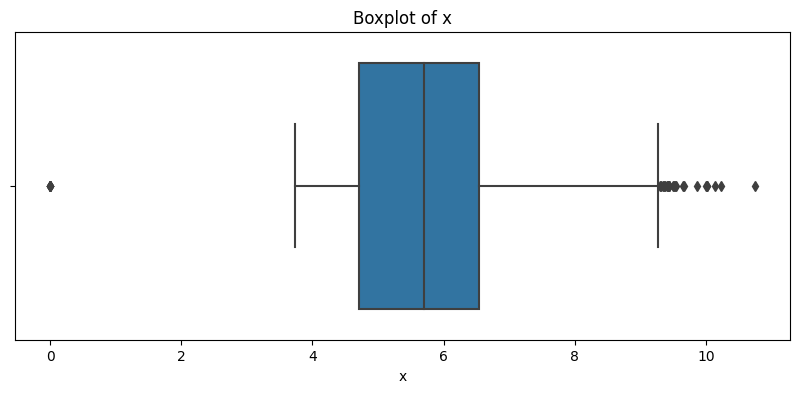

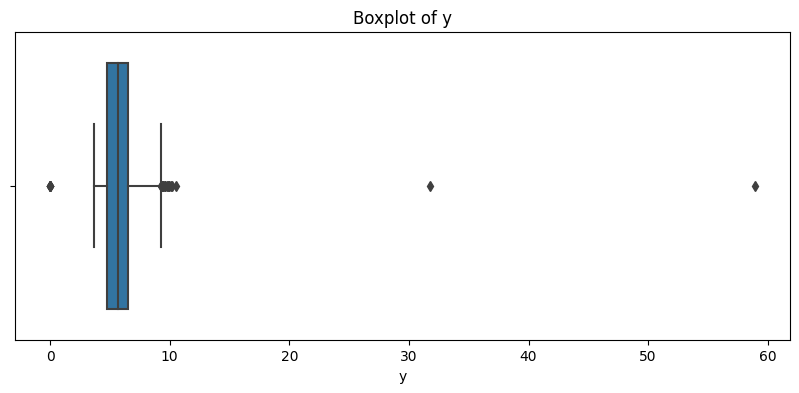

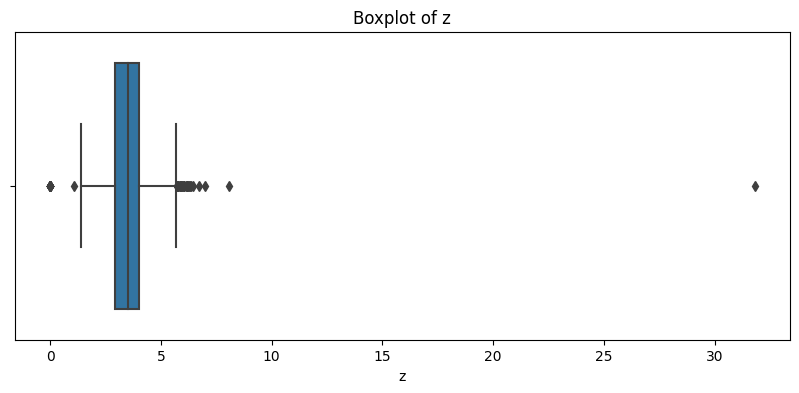

In [ ]:
# Identifying outliers with boxplots
for column in df1.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df1[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# 7. Produce a correlation heatmap

We'll use a heatmap to understand the relationship between variables.

<ipython-input-14-1f391938f05f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


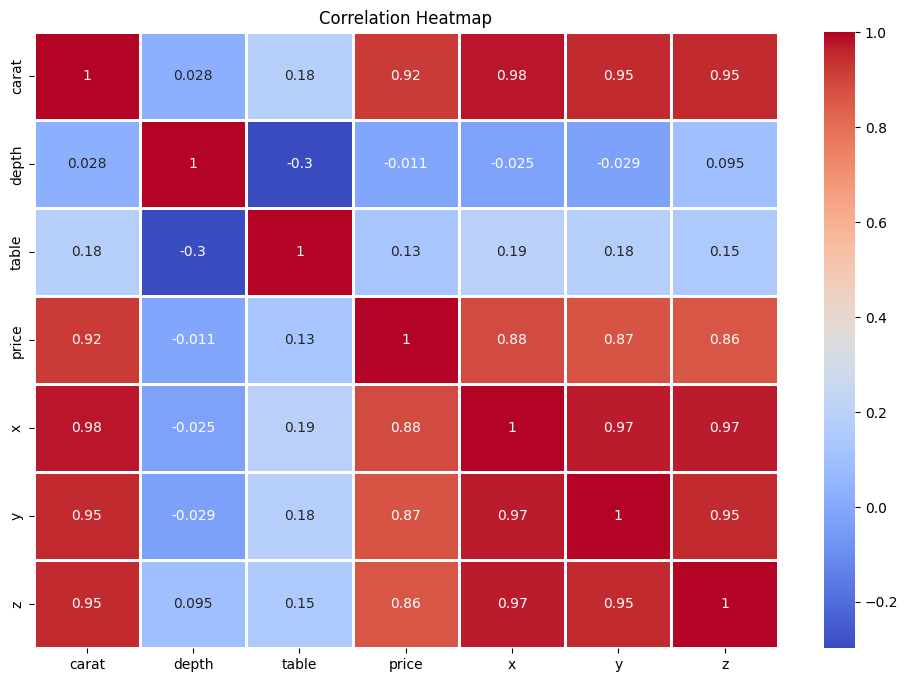

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()